# Basic Cleaning

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv(r'https://raw.githubusercontent.com/Himanshu-1703/reddit-sentiment-analysis/refs/heads/main/data/reddit.csv')
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [3]:
df.shape

(37249, 2)

In [4]:
df.sample()['clean_comment'].values

array(['oof'], dtype=object)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB


In [6]:
df.isnull().sum()

clean_comment    100
category           0
dtype: int64

In [7]:
df[df['clean_comment'].isna()].head()

,clean_comment,category
413,NaN,0
605,NaN,0
2422,NaN,0
2877,NaN,0
3307,NaN,0


In [8]:
df[df['clean_comment'].isna()]['category'].value_counts()

0    100
Name: category, dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.duplicated().sum()

350

In [11]:
df[df.duplicated()].head()

,clean_comment,category
375,,0
392,,0
617,aurum mom,0
651,,0
1222,,0


In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.duplicated().sum()

0

In [14]:
df[(df['clean_comment'].str.strip()=='')].values

array([[' ', 0],
       ['\n', 0],
       ['    ', 0],
       ['  ', 0],
       ['\n                    ', 0],
       ['   ', 0]], dtype=object)

In [15]:
df=df[~(df['clean_comment'].str.strip()=='')]

In [16]:
df['clean_comment']=df['clean_comment'].str.lower()

In [17]:
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [18]:
df[df['clean_comment'].apply(lambda x:x.startswith(' ') or x.endswith(' '))]

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1
...,...,...
37241,let the janta decide not ulema clerics,0
37242,hona hai same with vaccination education insu...,0
37246,downvote karna tha par upvote hogaya,0
37247,haha nice,1


In [19]:
df['clean_comment']=df['clean_comment'].str.strip()

In [20]:
df['clean_comment'].apply(lambda x:x.startswith(' ') or x.endswith(' ')).sum()

0

In [21]:
url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
comment_with_url=df[df['clean_comment'].str.contains(url_pattern,regex=True)]
comment_with_url.head()

,clean_comment,category


In [22]:
comments_with_newline=df[df['clean_comment'].str.contains('\n')]
comments_with_newline.head()

,clean_comment,category
448,what missing jpg\nand why this brilliant edit ...,1
781,india has been ruined congress and populist sc...,-1
847,like aap for its stand corruption and making p...,-1
871,reduced trade\ndeficit stronger rupee aren the...,0
1354,amsa press conference australian maritime safe...,1


In [23]:
comments_with_newline.iloc[0]

clean_comment    what missing jpg\nand why this brilliant edit ...
category                                                         1
Name: 448, dtype: object

In [24]:
df['clean_comment']=df['clean_comment'].str.replace('\n',' ',regex=True)
comments_with_new_line_remaining=df[df['clean_comment'].str.contains('\n')]

In [25]:
comments_with_new_line_remaining.shape

(0, 2)

# EDA

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='category', ylabel='count'>

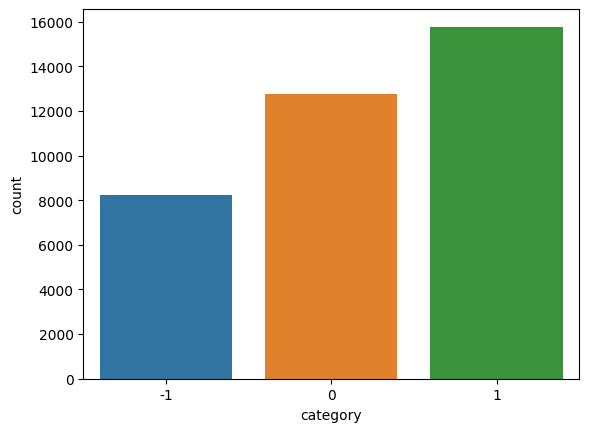

In [27]:
sns.countplot(data=df,x='category')
plt.title(label='Category wise Words count')
plt.show()

In [28]:
df['category'].value_counts(normalize=True).mul(100).round(2)

 1    42.86
 0    34.71
-1    22.42
Name: category, dtype: float64

In [29]:
df['word_count']=df['clean_comment'].apply(lambda x:len(x.split()))

In [30]:
df.sample()

,clean_comment,category,word_count
25920,social media shit pile general people need lea...,-1,11


In [31]:
df.describe()

,category,word_count
count,36793.000000,36793.000000
mean,0.204414,29.667464
std,0.781729,56.790738
min,-1.000000,1.000000
25%,0.000000,6.000000
50%,0.000000,13.000000
75%,1.000000,30.000000
max,1.000000,1307.000000


<Figure size 500x2000 with 0 Axes>

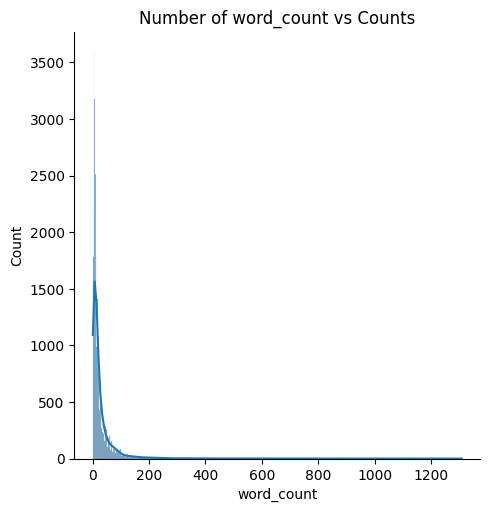

In [32]:
plt.figure(figsize=(5,20))
sns.displot(data=df, x='word_count', kde=True)
plt.title(label='Number of word_count vs Counts')
plt.show()


- the plot is right skewed it implies Very few words in each comments column
- Around 3200 times a prticualar words are used in the comments column
- Commets have similar word counts as the spread is not wide but narrow.

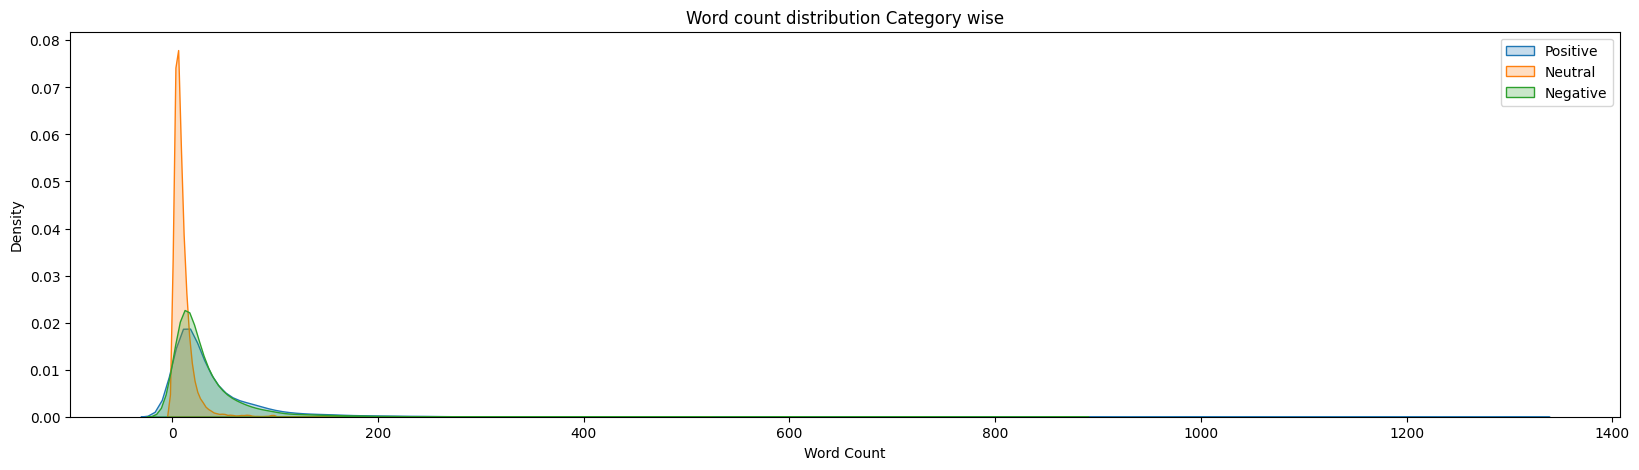

In [33]:
plt.figure(figsize=(20,5))
sns.kdeplot(data=df[df['category']==1]['word_count'],label='Positive',fill=True)
sns.kdeplot(data=df[df['category']==0]['word_count'],label='Neutral',fill=True)
sns.kdeplot(data=df[df['category']==-1]['word_count'],label='Negative',fill=True)
plt.title(label='Word count distribution Category wise')
plt.xlabel('Word Count')
plt.ylabel('Density')
plt.legend()
plt.show()

- From the plot for Neutral comments, less number of words are used with more repetivie.
- From the plot for Positive comments, more words are used with less repetitive.

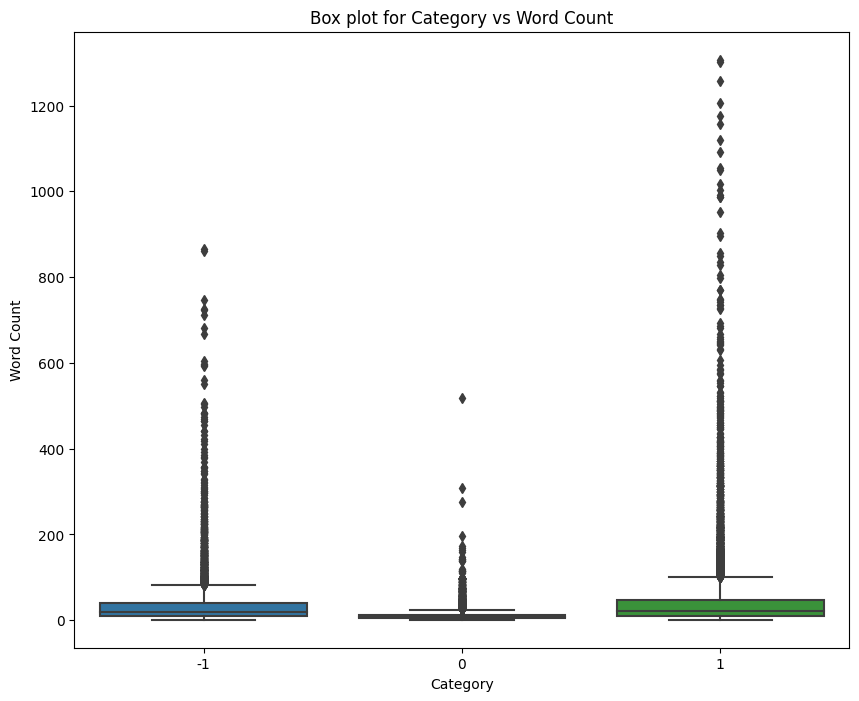

In [34]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df,x='category',y='word_count')
plt.xlabel('Category')
plt.ylabel('Word Count')
plt.title('Box plot for Category vs Word Count')
plt.show()

- From the box plot for Positive commets the median is high and the number of words used is also high in each comment.
- From the box plot for Neutral comments the median is low and the number of words used is low in each comment.

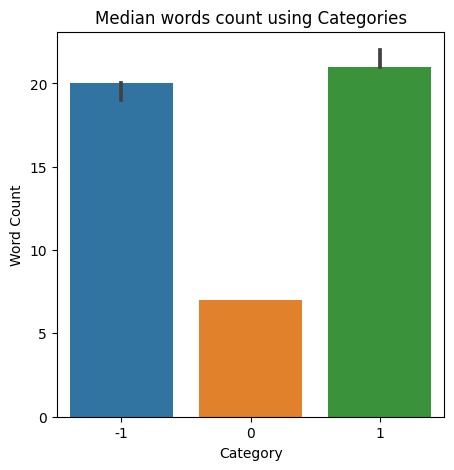

In [35]:
plt.figure(figsize=(5,5))
sns.barplot(data=df,x='category',y='word_count',estimator='median')
plt.xlabel('Category')
plt.ylabel('Word Count')
plt.title(label='Median words count using Categories')
plt.show()

- Positive Comments:
     - Median word count is high, around 21 words.
     - Users tend to elaborate on their good experiences.
     - Indicates high emotional engagement with positive sentiment.
- Neutral Comments:
     - Median word count is the lowest, around 6–7 words.
     - Comments are typically short and less expressive.
     - Reflect minimal emotional content or opinion.
- Negative Comments:
     - Median word count is similar to positive, around 20 words.
     - Users often explain complaints or dissatisfaction in detail.
     - High emotional involvement drives longer comments.

In [36]:
from nltk.corpus import stopwords

In [38]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

- Frequently occurring words (e.g., "the", "and", "is") that carry little semantic meaning.
- Removing them reduces noise and focuses analysis on meaningful terms.

In [39]:
stop_words=set(stopwords.words('english'))

In [40]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [41]:
df['num_stop_words']=df['clean_comment'].apply(lambda x: len([word for word in x.split() if word in stop_words]))

In [42]:
df.sample(5)

,clean_comment,category,word_count,num_stop_words
26884,the first city mentioned the article mumbai li...,1,17,6
10970,terima kasih untuk pasukan orange yang sudah s...,0,22,0
641,just who the fuck harsh vardhan and how winnin...,-1,11,5
506,need stop watching the garbage that you watch ...,1,54,27
6490,not sure who india needs fear the most,1,8,4


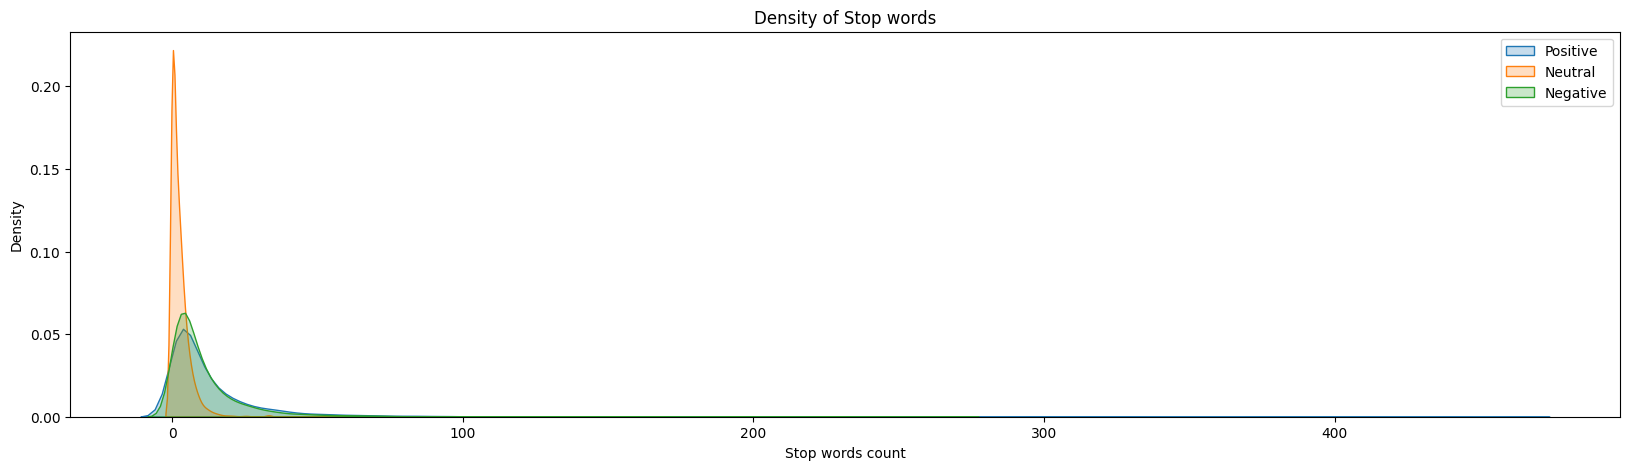

In [168]:
plt.figure(figsize=(20,5))
sns.kdeplot(data=df[df['category']==1]['num_stop_words'],label='Positive',fill=True)
sns.kdeplot(data=df[df['category']==0]['num_stop_words'],label='Neutral',fill=True)
sns.kdeplot(data=df[df['category']==-1]['num_stop_words'],label='Negative',fill=True)
plt.xlabel('Stop words count')
plt.ylabel('Density')
plt.title(label='Density of Stop words')
plt.legend()
plt.show()

- From the plot the Neutral comments have less number of stop words but used more frequently.
- From the plot the Positive comments and Negative comments have more number of stop words but not used frequently.

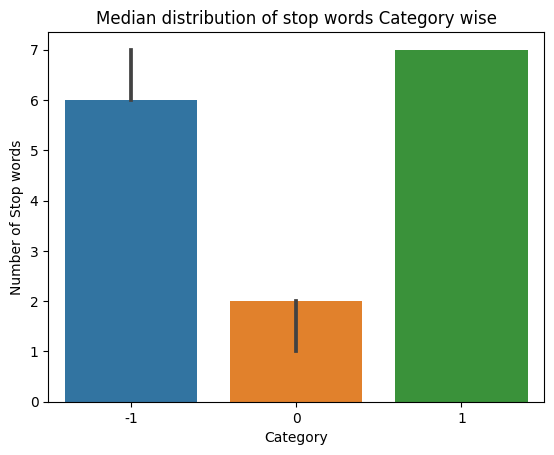

In [49]:
sns.barplot(data=df,x='category',y='num_stop_words',estimator='median')
plt.xlabel('Category')
plt.ylabel('Number of Stop words')
plt.title(label='Median distribution of stop words Category wise')
plt.show()

In [52]:
from collections import Counter
all_stop_words=[ word for comment in df['clean_comment']  for word in comment.split() if word in stop_words ]
most_common_stop_words=Counter(all_stop_words).most_common(25)
top_25_common_stop_words=pd.DataFrame(data=most_common_stop_words,columns=['Common_stop_words','Count'])

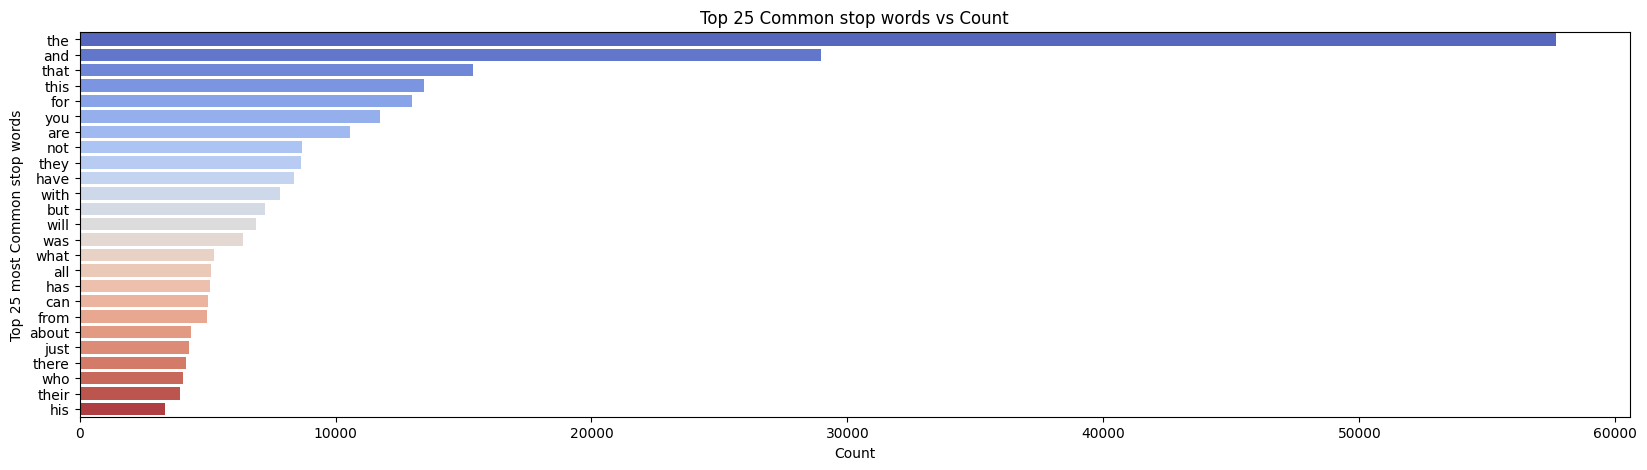

In [170]:
plt.figure(figsize=(20,5))
sns.barplot(data=top_25_common_stop_words,x='Count',y='Common_stop_words',palette='coolwarm')
plt.xlabel('Count')
plt.ylabel('Top 25 most Common stop words')
plt.title(label='Top 25 Common stop words vs Count')
plt.show()

In [57]:
df['num_char']=df['clean_comment'].apply(len)
df.head()

,clean_comment,category,word_count,num_stop_words,num_char
0,family mormon have never tried explain them th...,1,39,13,259
1,buddhism has very much lot compatible with chr...,1,196,59,1268
2,seriously don say thing first all they won get...,-1,86,40,459
3,what you have learned yours and only yours wha...,0,29,15,167
4,for your own benefit you may want read living ...,1,112,45,690


In [67]:
all_text=' '.join(df['clean_comment'])
character_frequency=Counter(all_text)
character_frequecy_df=pd.DataFrame(data=character_frequency.items(),columns=['Character','Frequecy']).sort_values(by='Frequecy',ascending=False)
character_frequecy_df.head(10)

,Character,Frequecy
6,,1091592
12,e,666610
13,t,491287
1,a,481134
3,i,401388
9,n,388465
7,o,379908
17,s,355279
8,r,331425
10,h,296748


In [82]:
df['num_punctuation_char']=df['clean_comment'].apply(lambda x: sum([1 for char in x if char in '.,!?;:"\'()[]{}-']))
df.head(5).query('num_punctuation_char > 0')

,clean_comment,category,word_count,num_stop_words,num_char,num_punctuation_char


- From the above query we found that there are no Punctuation characters found

CountVectorizer:
- It converts a collection of text documents into a numeric matrix where each row represents a document, and each column represents a word (or "token") from the entire dataset. 
- The values in the matrix indicate how many times each word appears in a given document.

In [83]:
from sklearn.feature_extraction.text import CountVectorizer

- Original Text → Tokenization → Stopword Removal → Bigram Generation → Vocabulary Indexing → Sparse Matrix

In [112]:
def get_top_ngrams(corpus,number_words,top_n=None):
    vec=CountVectorizer(ngram_range=(number_words,number_words),stop_words='english')
    bag_of_words=vec.fit_transform(corpus)
    sum_words=bag_of_words.sum(axis=0)
    words_frequecy= [(word,sum_words[0,idx]) for word,idx in vec.vocabulary_.items()]
    top_n_sroted_grams=sorted(words_frequecy,key=lambda x:x[1],reverse=True)[:top_n]
    return pd.DataFrame(data=top_n_sroted_grams,columns=[f'{number_words}_Gram_Words','Count'])

In [113]:
top_25_bigrams=get_top_ngrams(df['clean_comment'],2,25)

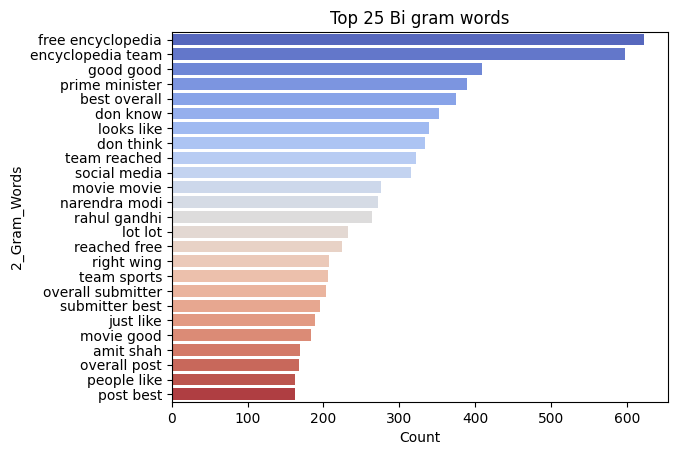

In [121]:
sns.barplot(data=top_25_bigrams,x='Count',y='2_Gram_Words',palette='coolwarm')
plt.xlabel('Count')
plt.ylabel('2_Gram_Words')
plt.title(label='Top 25 Bi gram words')
plt.show()

In [118]:
top_25_trigrams=get_top_ngrams(df['clean_comment'],3,25)

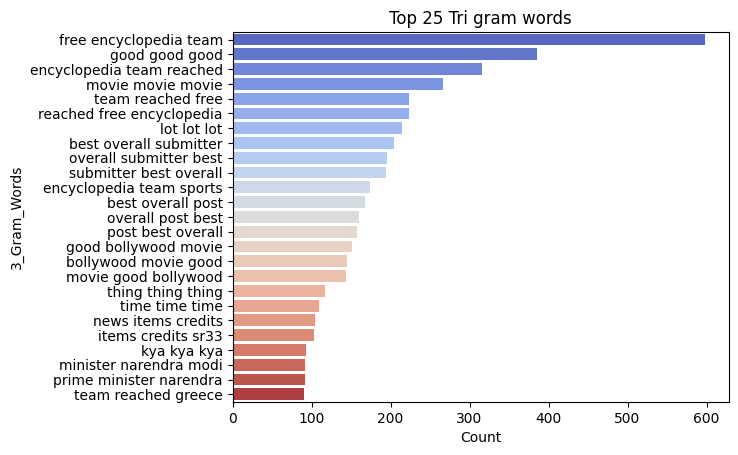

In [122]:
sns.barplot(data=top_25_trigrams,x='Count',y='3_Gram_Words',palette='coolwarm')
plt.xlabel('Count')
plt.ylabel('3_Gram_Words')
plt.title(label='Top 25 Tri gram words')
plt.show()

In [123]:
import re

In [124]:
df['clean_comment']=df['clean_comment'].apply(lambda x:re.sub(r'[^A-Za-z0-9\s!?.,]', '', str(x)))

In [126]:
stop_words_final=set(stopwords.words('english'))-{'not','but','however','no','yet'}
df['clean_comment']=df['clean_comment'].apply(lambda x:' '.join([word for word in x.split() if word not in stop_words_final]))
df.head()

,clean_comment,category,word_count,num_stop_words,num_char,num_punctuation_char
0,family mormon never tried explain still stare ...,1,39,13,259,0
1,buddhism much lot compatible christianity espe...,1,196,59,1268,0
2,seriously say thing first get complex explain ...,-1,86,40,459,0
3,learned want teach different focus goal not wr...,0,29,15,167,0
4,benefit may want read living buddha living chr...,1,112,45,690,0


In [127]:
from nltk.stem import WordNetLemmatizer

WordNetLemmatizer is a tool from the NLTK library that reduces words to their base or dictionary form (lemma), using the WordNet lexical database. Unlike stemming (which crudely chops off word endings), lemmatization considers context and part-of-speech (POS) to return valid words.

In [128]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\user/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [129]:
lemmatizer=WordNetLemmatizer()
df['clean_comment']=df['clean_comment'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

In [130]:
df.head()

,clean_comment,category,word_count,num_stop_words,num_char,num_punctuation_char
0,family mormon never tried explain still stare ...,1,39,13,259,0
1,buddhism much lot compatible christianity espe...,1,196,59,1268,0
2,seriously say thing first get complex explain ...,-1,86,40,459,0
3,learned want teach different focus goal not wr...,0,29,15,167,0
4,benefit may want read living buddha living chr...,1,112,45,690,0


In [131]:
from wordcloud import WordCloud

In [148]:
def plot_word_cloud(text,label):
    word_cloud=WordCloud(width=800, height=400,background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10,10))
    plt.imshow(word_cloud,interpolation='bilinear')
    plt.title(label,fontdict={'fontsize':30,'fontweight': 30,'color':'red'})
    plt.axis('off')
    plt.show()

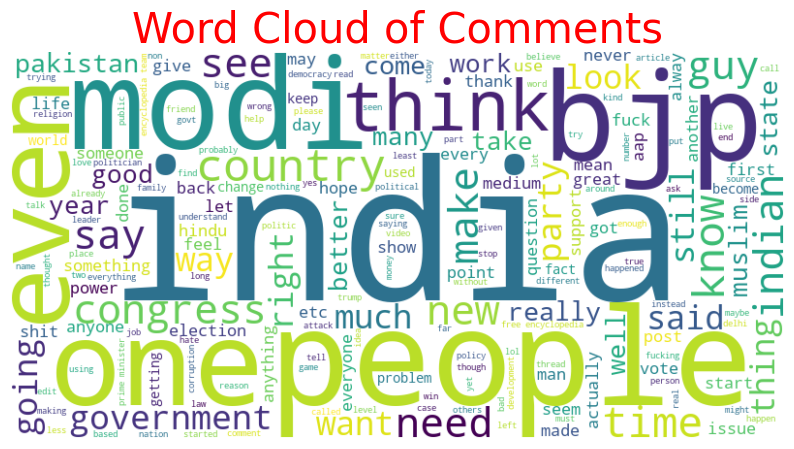

In [149]:
plot_word_cloud(df['clean_comment'],'Word Cloud of Comments')

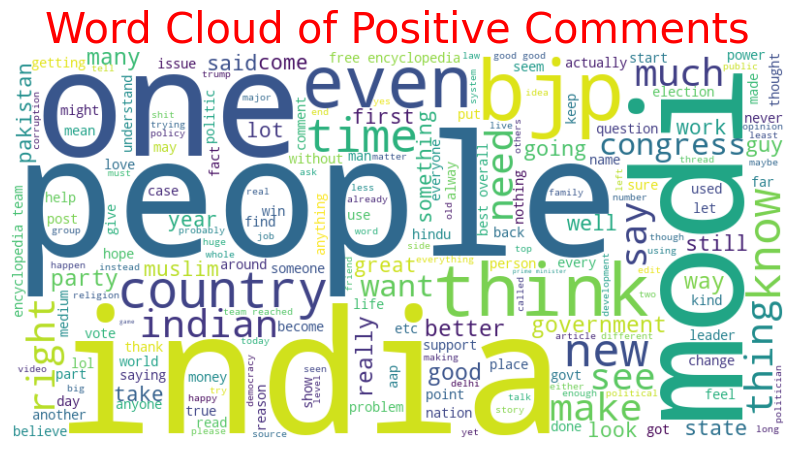

In [150]:
plot_word_cloud(df[df['category']==1]['clean_comment'],'Word Cloud of Positive Comments')

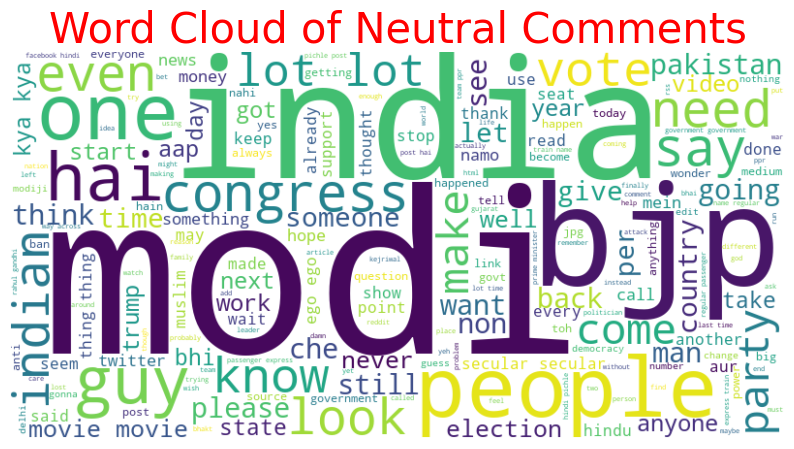

In [151]:
plot_word_cloud(df[df['category']==0]['clean_comment'],'Word Cloud of Neutral Comments')

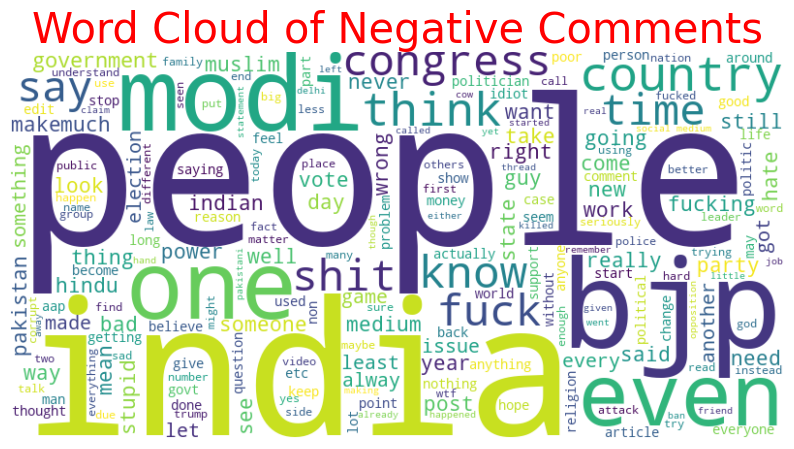

In [152]:
plot_word_cloud(df[df['category']==-1]['clean_comment'],'Word Cloud of Negative Comments')

In [162]:
def plot_top_n_words(data,top_n,label):
    words=' '.join(data['clean_comment']).split()
    counter=Counter(words)
    most_common_words=counter.most_common(top_n)
    words,counts=zip(*most_common_words)

    sns.barplot(x=list(counts),y=list(words),palette='coolwarm')
    plt.xlabel('Count')
    plt.ylabel('Most Frequent words')
    plt.title(f'Top {top_n} Most {label} words')

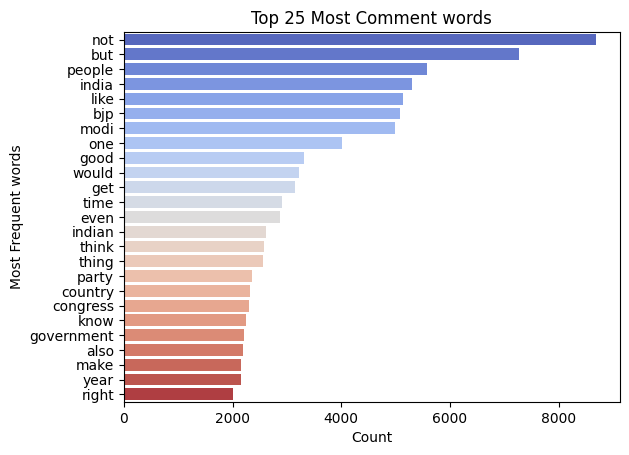

In [163]:
plot_top_n_words(df,25,'Comment')

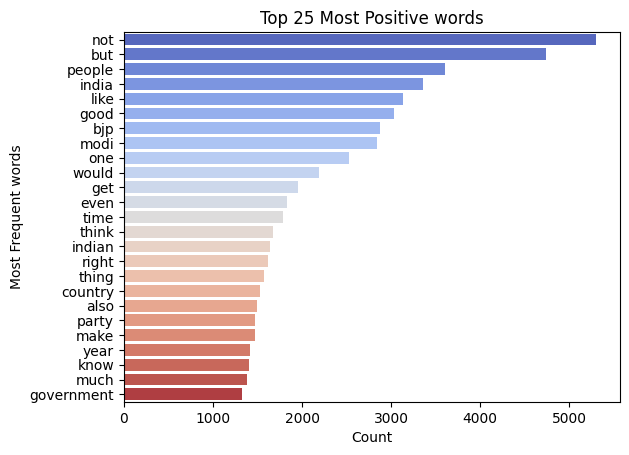

In [164]:
plot_top_n_words(df[df['category']==1],25,'Positive')

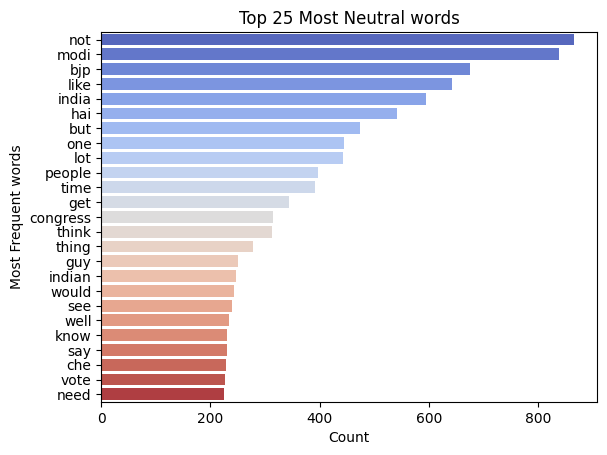

In [166]:
plot_top_n_words(df[df['category']==0],25,'Neutral')

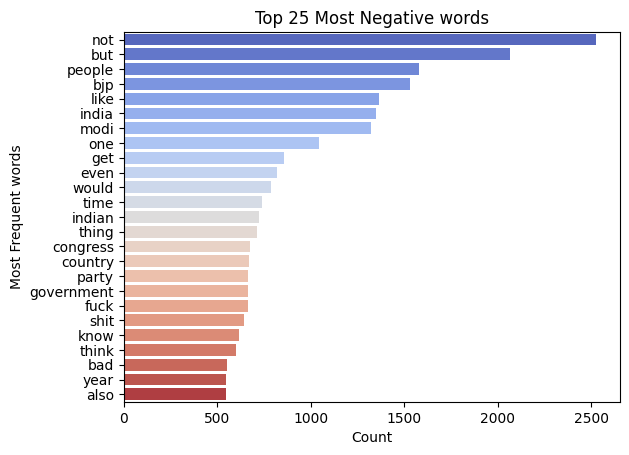

In [167]:
plot_top_n_words(df[df['category']==-1],25,'Negative')